In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dquintani/covid/main/casos_diarios.csv", index_col=0)
df

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
2020-03-10,0,0,0,0,0,0,0,0,0,0
2020-03-11,1,0,0,1,0,0,0,0,0,0
2020-03-12,0,0,0,0,0,0,0,0,0,0
2020-03-13,7,0,1,0,6,0,0,0,0,0
2020-03-14,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2021-11-22,883,22,147,489,8,15,70,113,1,18
2021-11-23,1059,103,159,593,28,8,48,102,9,9
2021-11-24,1203,190,141,648,38,9,50,114,2,11
2021-11-25,1125,156,134,559,18,20,57,159,8,14


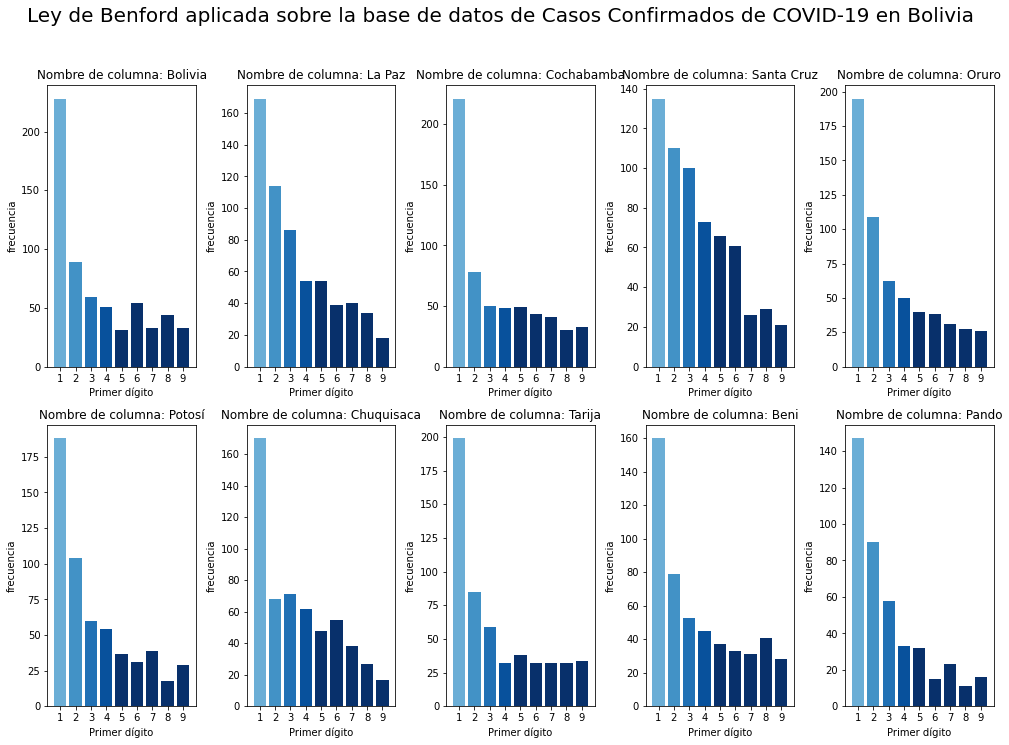

In [3]:
df = df.astype(str)

n = range(1,10)
n = map(str,n)
n = list(n)

fig, axs = plt.subplots(2,5, figsize=(14,10), sharex=False)
fig.suptitle("Ley de Benford aplicada sobre la base de datos de Casos Confirmados de COVID-19 en Bolivia", fontsize=20, y =1.03)

df_freq = pd.DataFrame()

for k in range(len(df.columns)):
    frequency = []

    for i in n:
        benford = df[df[df.columns[k]].str.startswith(i)]
        frequency.append(len(benford))
    df_freq.append(frequency)
    
    axs = axs.flatten()
    axs[k].bar(n, frequency, color = plt.get_cmap("Blues", 9)(range(4,15)))
    axs[k].set_title("Nombre de columna: "+df.columns[k])
    axs[k].set_xlabel("Primer dígito")
    axs[k].set_ylabel("frecuencia")
    

    fig.tight_layout()